In [5]:
import time
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Ant Colony Optimization

In our routing optimization project, we have implemented an Ant Colony Optimization (ACO) algorithm to simulate the collective behavior of ants in discovering efficient routes. ACO is inspired by real-world ant foraging behaviors, where ants communicate through pheromone trails to find and reinforce the shortest paths between their nest and a food source. By replicating this process in our algorithm, we can explore numerous potential routes and converge on the most efficient paths for our transportation needs.

### **Parameters :**
**Number of Nodes** (```num_nodes```): Defines the total number of locations in the routing network.

**Number of Ants** (```num_ants```): Specifies how many ants will explore different paths in parallel to find the optimal route.

**Number of Generations** (```num_generations```): Sets the number of iterations the algorithm will run, allowing ants to repeatedly refine their paths.

**Decay Rate** (```decay_rate```): Controls how quickly pheromone trails evaporate over time, affecting how much influence older paths have on the ants’ decisions.

**Pheromone Influence** (```alpha```): Determines how much the pheromone levels influence the ants’ path selection relative to other factors.

**Heuristic Influence** (```beta```): Sets the weight placed on the distances between nodes, influencing ants to prefer shorter paths.

**Initial Pheromone Level** (```pheromone_init```): Defines the starting pheromone level for all edges in the graph before any ants begin exploring.

Generation 1: Best path cost = 9246.711696981278
Generation 2: Best path cost = 9246.711696981278
Generation 3: Best path cost = 9246.711696981278
Generation 4: Best path cost = 9230.678392121084
Generation 5: Best path cost = 9230.678392121084
Generation 6: Best path cost = 9230.678392121084
Generation 7: Best path cost = 9230.678392121084
Generation 8: Best path cost = 9230.678392121084
Generation 9: Best path cost = 9227.864201099703
Generation 10: Best path cost = 9209.801587981116
Generation 11: Best path cost = 9199.57127966861
Generation 12: Best path cost = 9189.744917131296
Generation 13: Best path cost = 9172.451451542798
Generation 14: Best path cost = 9156.332297775372
Generation 15: Best path cost = 9151.071299386547
Generation 16: Best path cost = 9147.816127272696
Generation 17: Best path cost = 9146.925640988267
Generation 18: Best path cost = 9133.997843810337
Generation 19: Best path cost = 9133.997843810337
Generation 20: Best path cost = 9133.997843810337
Generation

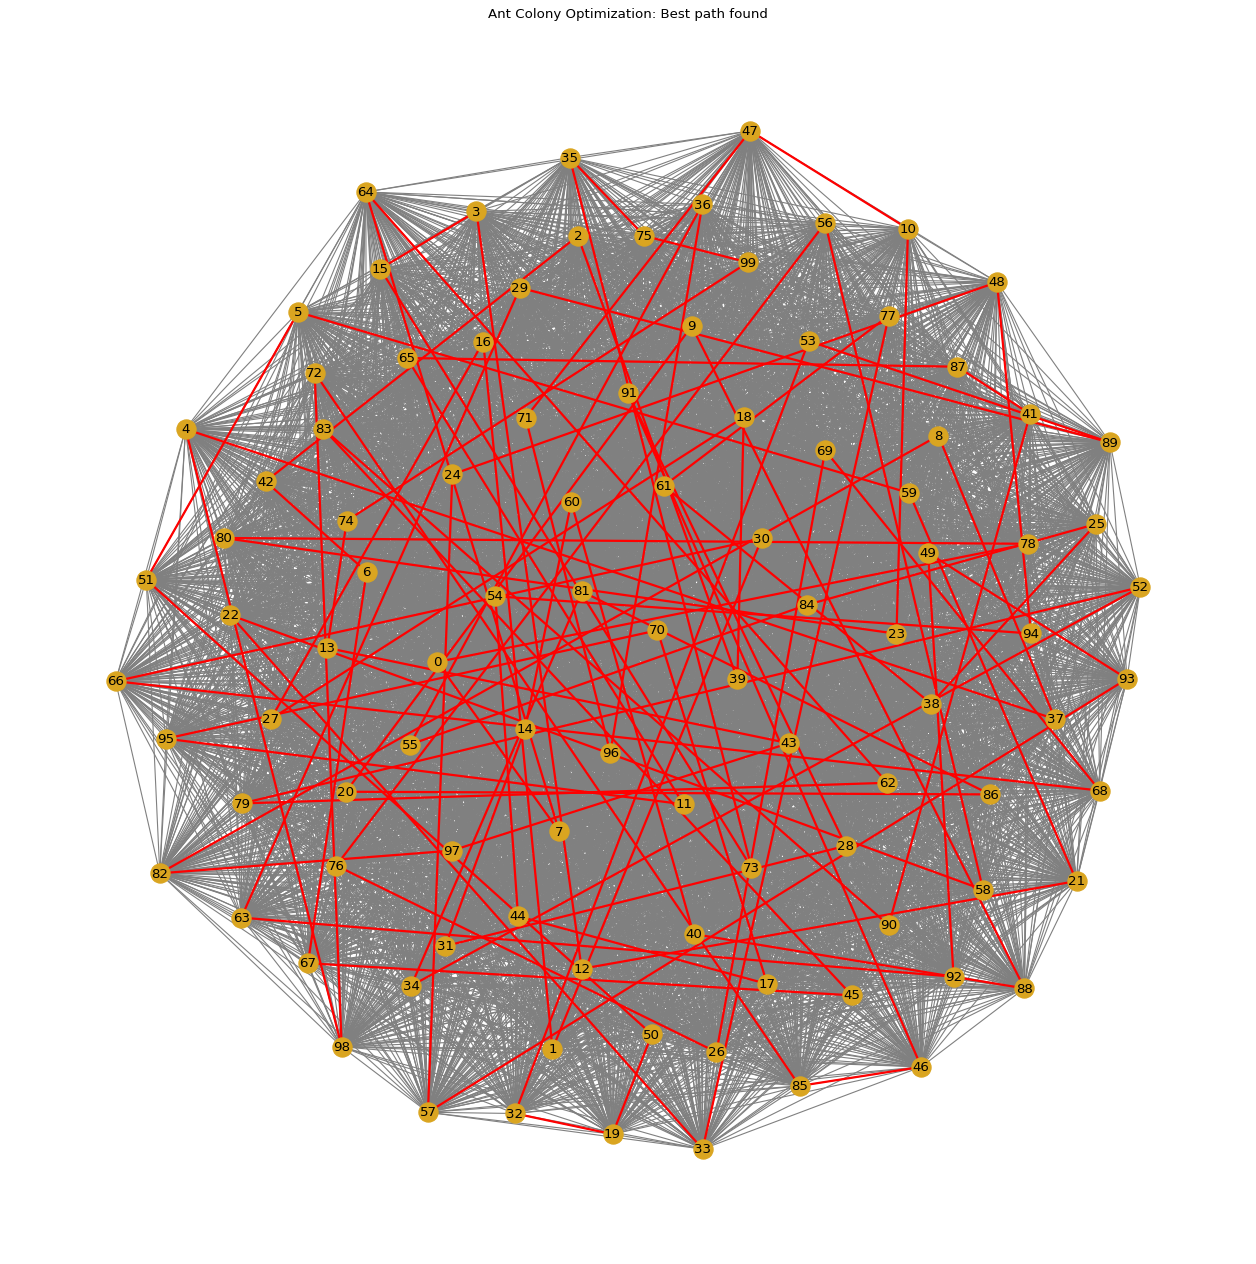

In [27]:
random.seed(3)  # Ensures reproducible results

# Parameters
num_nodes = 100  # Total number of locations
num_ants = 50  # Number of ants
num_generations = 100  # Iterations to refine paths
decay_rate = 0.5  # Pheromone decay rate
alpha = 1  # Pheromone influence
beta = 2  # Distance influence
pheromone_init = 1.0  # Initial pheromone level on all edges

# Function to calculate path cost with collection point penalties
def calculate_path_cost(graph, path, collection_points):
    cost = 0.0
    penalty = 0.0
    for i in range(len(path) - 1):
        source = path[i]
        target = path[i + 1]
        
        # Apply penalty if not visiting correct collection point
        if target != collection_points.get(target, target):
            penalty += 100  # Penalty for wrong collection point
        
        # Add edge weight to total cost
        cost += graph[source][target]['weight']
    return cost + penalty

# Initialize pheromone levels for each edge in the graph
def initialize_pheromone(graph, initial_pheromone):
    pheromones = {}
    for (u, v) in graph.edges():
        pheromones[(u, v)] = initial_pheromone
        pheromones[(v, u)] = initial_pheromone
    return pheromones

# Update pheromone levels on paths based on quality
def update_pheromones(pheromones, all_paths, decay_rate):
    # Evaporate pheromones on all edges
    for edge in pheromones:
        pheromones[edge] *= (1 - decay_rate)
    
    # Reinforce pheromone on edges of better paths
    for path, cost in all_paths:
        for i in range(len(path) - 1):
            u, v = path[i], path[i + 1]
            pheromones[(u, v)] += 1.0 / cost
            pheromones[(v, u)] += 1.0 / cost

# Main function to run Ant Colony Optimization (ACO)
def ant_colony_optimization(graph, num_ants, num_generations, decay_rate, alpha, beta, collection_points):
    pheromones = initialize_pheromone(graph, pheromone_init)
    best_path = None
    best_path_cost = float('inf')
    best_path_costs = []  # Track best path cost each generation

    for generation in range(num_generations):
        all_paths = []  # Store paths and costs for all ants

        # Each ant builds a path
        for _ in range(num_ants):
            path = [0]  # Start at node 0
            unvisited = set(graph.nodes) - {0}
            
            while unvisited:
                current_node = path[-1]
                
                # Calculate probabilities for moving to next node
                probabilities = []
                for neighbor in unvisited:
                    edge = (current_node, neighbor)
                    pheromone = pheromones.get(edge, 1.0)
                    distance = graph[current_node][neighbor]['weight']
                    # Influence of pheromone and distance
                    probabilities.append((neighbor, (pheromone ** alpha) * ((1.0 / distance) ** beta)))
                
                # Normalize probabilities and choose next node
                total = sum(prob[1] for prob in probabilities)
                probabilities = [(node, prob / total) for node, prob in probabilities]
                next_node = random.choices([node for node, _ in probabilities], [prob for _, prob in probabilities])[0]
                
                path.append(next_node)
                unvisited.remove(next_node)
            
            path.append(0)  # Return to start
            path_cost = calculate_path_cost(graph, path, collection_points)
            all_paths.append((path, path_cost))

            # Track the best path found
            if path_cost < best_path_cost:
                best_path = path
                best_path_cost = path_cost

        # Update pheromones after each generation
        update_pheromones(pheromones, all_paths, decay_rate)
        best_path_costs.append(best_path_cost)  # Record best cost for this generation
        print(f"Generation {generation + 1}: Best path cost = {best_path_cost}")
    
    return best_path, best_path_costs

# Set up the graph and collection points
graph = nx.complete_graph(num_nodes)
for (source, target) in graph.edges():
    graph[source][target]['weight'] = random.uniform(1, 10)  # Random edge weights

collection_points = {i: (i % 10) for i in range(1, num_nodes)}  # Define collection points

# Run the ACO algorithm
best_path, best_path_costs = ant_colony_optimization(
    graph, num_ants, num_generations, decay_rate, alpha, beta, collection_points
)

# Visualize the best path found
pos = nx.spring_layout(graph, k=0.5)
plt.figure(figsize=(20, 20), dpi=80)
nx.draw_networkx_nodes(graph, pos, node_color='goldenrod')
nx.draw_networkx_edges(graph, pos, edge_color='gray')
nx.draw_networkx_labels(graph, pos)
best_edges = [(best_path[i], best_path[i + 1]) for i in range(len(best_path) - 1)]
nx.draw_networkx_edges(graph, pos, edgelist=best_edges, edge_color='red', width=2)
plt.title("Ant Colony Optimization: Best path found")
plt.axis('off')
plt.show()


# Genetic Algorithm

### **Parameters**
**Population Size** (```population_size```): Defines how many individuals (routes) are in the population at the start of each generation.

**Number of Generations** (```num_generations```): Specifies how many iterations the algorithm will run to evolve the population of solutions.

**Tournament Size** (```tournament_size```): The number of individuals selected randomly from the population to compete in the tournament for parent selection.

**Mutation Rate** (```mutation_rate```): The probability of applying mutation to an individual during the evolution process.

**Collection Points** (```collection_points```): A dictionary representing specific collection points for each item. For example, each node has an associated collection point that should be visited by the algorithm.

### **Selection methods**

In a genetic algorithm, selection methods help determine which solutions are chosen to create the next generation, driving the algorithm toward better solutions. Selection is crucial because it impacts how quickly the algorithm can find an optimal solution and how much diversity is maintained in the population, which prevents it from getting stuck in poor solutions. The main selection methods are the roulette selection, tournament selection, and rank selection, each with unique advantages.

#### Roulette Selection :
Roulette selection, or time-proportionate selection, assigns each solution a segment on a virtual wheel. Here, the size of each segment is proportional to how short the travel time of that solution is. When the wheel spins, solutions with shorter travel times have larger segments, increasing their chances of selection while still allowing all routes to be chosen. This method is beneficial for steadily improving time efficiency, as it biases selection towards solutions with shorter travel times without completely discarding routes with longer times. However, if certain routes have extremely short times, they might dominate the selection too early, which could limit the exploration of new routes that might lead to better solutions.

#### Tournament Selection :
In tournament selection, small groups of solutions are randomly chosen for a “tournament,” and the one with the shortest travel time in the group is selected as the winner. The tournament size (the number of solutions competing each round) determines the balance between selecting the best routes and maintaining diversity. A larger tournament size increases the likelihood of selecting routes with shorter travel times, while a smaller size allows for more varied selection, preventing premature convergence. Tournament selection is particularly helpful for time optimization because it allows you to adjust the intensity of time preference, which lets the algorithm balance between finding the fastest solutions and exploring new possibilities to refine them further.

#### Rank Selection :
Rank selection uses the relative ranking of each solution based on travel time, rather than absolute time values. Solutions are sorted in ascending order of travel time, and selection probabilities are assigned according to rank. The top-ranked (fastest) routes are more likely to be selected, but every route has a chance, as ranking prevents any single solution from dominating due to exceptionally low travel times. This approach is especially useful in time-based optimization because it avoids situations where a few very fast solutions completely overshadow others. By focusing on rank, the algorithm maintains a steadier exploration, as the chance of selection is distributed, allowing more routes to be tested over time.

### **Crossover**

Crossover is the process by which two parent solutions combine to create one or more offspring. This operator is crucial in genetic algorithms, as it allows for the exchange of genetic material between solutions, potentially combining the best traits of both parents. The primary goal of crossover is to combine good solutions to produce better solutions, driving the algorithm toward optimal solutions.

### **Mutation**
Mutation is a random alteration of an individual solution to introduce new genetic material into the population. It’s a critical operator because it prevents the genetic algorithm from getting stuck in local optima by exploring new parts of the solution space. Without mutation, the algorithm would only combine existing solutions, potentially missing out on better solutions.

### **Fitness Function**
In our genetic algorithm, we use travel time as the fitness measure instead of a traditional fitness function. Each solution (route) is evaluated based on its total travel time, with the goal of minimizing this time. This choice is made because the problem's objective is to optimize delivery routes by minimizing the time spent traveling.

Although we don’t define a separate fitness function, the total travel time effectively serves as the fitness score. Shorter travel times indicate better solutions, guiding the algorithm toward faster routes. This approach directly aligns with our objective, ensuring the algorithm focuses on finding the most time-efficient routes while respecting the problem's constraints.

Best path found by the Genetic Algotithm :  [0, 27, 92, 80, 45, 91, 73, 82, 96, 99, 24, 33, 55, 38, 14, 39, 94, 43, 20, 29, 49, 75, 2, 35, 9, 87, 85, 51, 77, 56, 34, 50, 12, 52, 16, 74, 63, 1, 7, 48, 68, 88, 31, 97, 79, 66, 61, 89, 25, 19, 54, 70, 83, 84, 47, 95, 30, 17, 98, 13, 23, 67, 44, 32, 18, 46, 58, 53, 60, 11, 26, 15, 64, 71, 93, 3, 6, 4, 69, 78, 37, 5, 86, 28, 36, 76, 21, 90, 10, 40, 62, 22, 59, 72, 81, 8, 65, 41, 42, 57, 0]


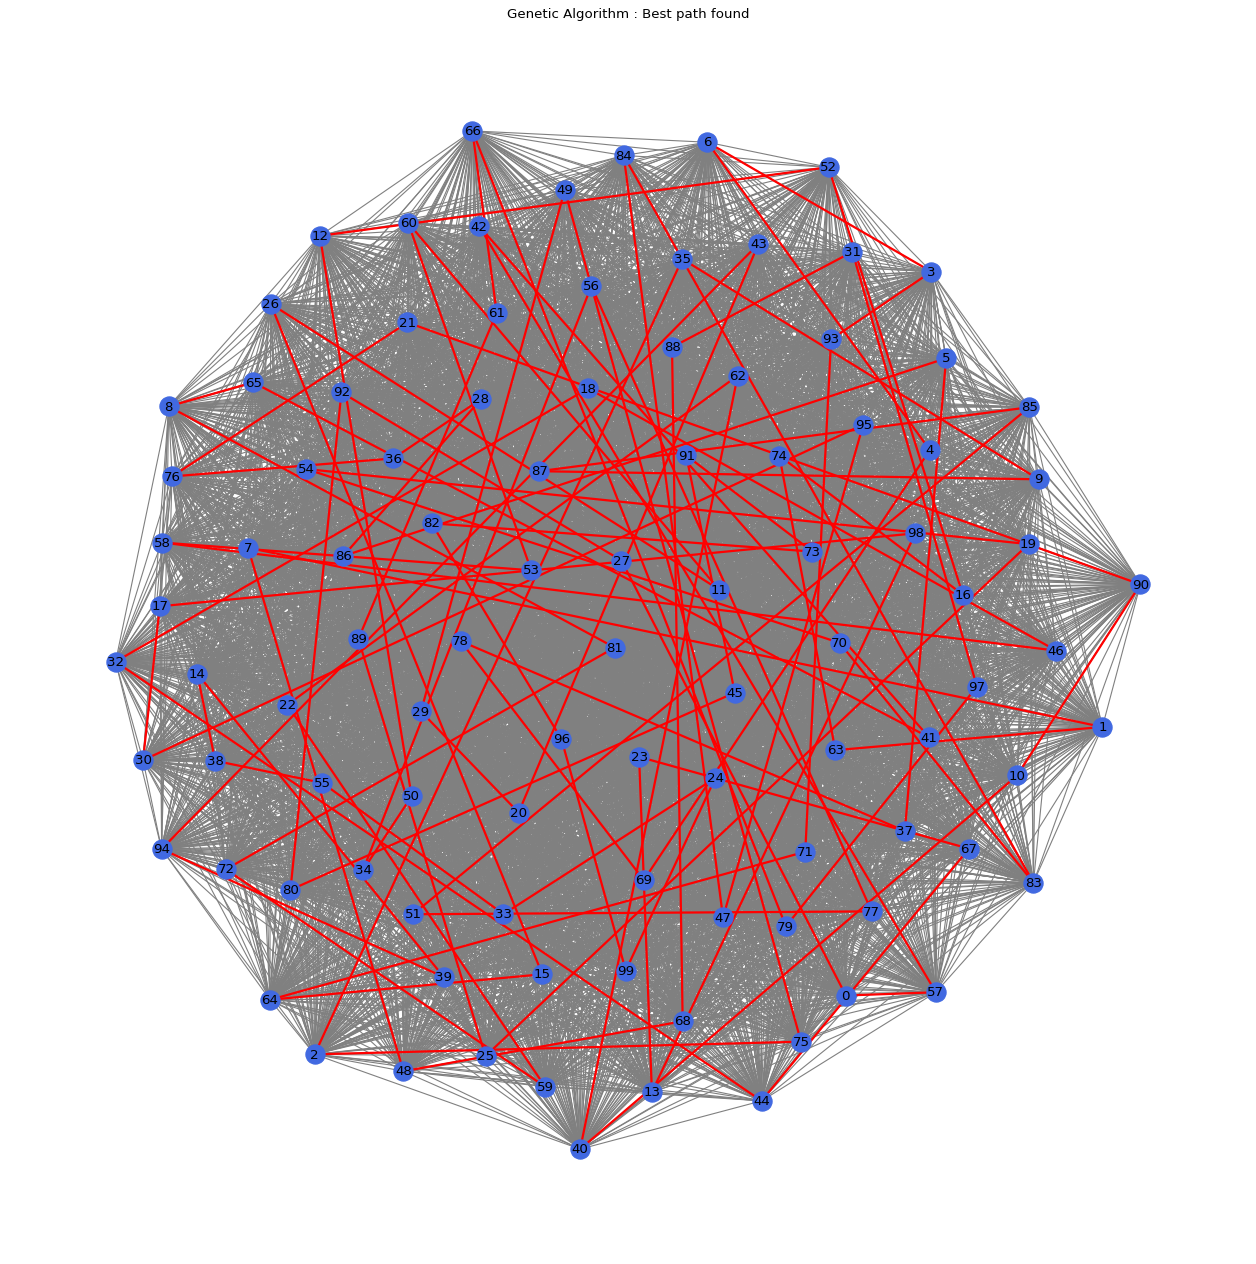

In [29]:
random.seed(a=3)

# Class representing an individual in the population
class Individual:
    def __init__(self, sequence):
        self.sequence = sequence
        self.fitness = 0.0
    
    def calculate_fitness(self, graph, collection_points):
        # Calculate the fitness based on the specific collection point constraint
        self.fitness = calculate_path_cost(graph, self.sequence, collection_points)

# Function to calculate the total cost of the path
def calculate_path_cost(graph, sequence, collection_points):
    cost = 0.0
    penalty = 0.0
    # Calculate the cost based on the edges in the graph and specific collection points
    for i in range(len(sequence) - 1):
        source = sequence[i]
        target = sequence[i + 1]
        
        # Check if the target matches the designated collection point
        if target != collection_points.get(target, target):
            penalty += 100  # Penalty for visiting an incorrect collection point
        
        cost += graph[source][target]['weight']
    return cost + penalty

# Function to generate the initial population
def generate_initial_population(graph, population_size, collection_points):
    population = []
    nodes = list(graph.nodes)
    nodes.remove(0)
    for _ in range(population_size):
        random.shuffle(nodes)
        sequence = [0] + nodes + [0]  # Start and end with node 0
        individual = Individual(sequence)
        individual.calculate_fitness(graph, collection_points)
        population.append(individual)
    return population

# Function for parent selection using tournament selection
def selection_tournament(population, tournament_size):
    parents = []
    for _ in range(len(population)):
        tournament = random.sample(population, tournament_size)
        winner = max(tournament, key=lambda x: x.fitness)
        parents.append(winner)
    return parents

# Function for crossover using partial order
def crossover(parent1, parent2):
    start = random.randint(1, len(parent1.sequence) - 3)
    end = random.randint(start + 1, len(parent1.sequence) - 2)
    subsequence = parent1.sequence[start:end]
    
    child_sequence = [node for node in parent2.sequence if node not in subsequence]
    child_sequence[start:start] = subsequence
    child_sequence = [0] + child_sequence[1:-1] + [0]  # Ensure it starts and ends with 0
    
    child = Individual(child_sequence)
    return child

# Function for mutation by inverting a sub-path
def mutation(individual):
    if len(individual.sequence) <= 3:
        return
    
    position1 = random.randint(1, len(individual.sequence) - 2)
    position2 = random.randint(1, len(individual.sequence) - 2)
    
    start = min(position1, position2)
    end = max(position1, position2)
    individual.sequence[start:end + 1] = reversed(individual.sequence[start:end + 1])

# Function to replace a part of the population
def replace_population(population, children):
    population.sort(key=lambda x: x.fitness, reverse=True)
    population[-len(children):] = children

# Main genetic algorithm function
def genetic_algorithm(graph, population_size, num_generations, tournament_size, mutation_rate, collection_points):
    population = generate_initial_population(graph, population_size, collection_points)
    best_path_costs = []
    
    for generation in range(num_generations):
        parents = selection_tournament(population, tournament_size)
        children = []
        
        for i in range(0, len(parents), 2):
            parent1 = parents[i]
            parent2 = parents[(i + 1) % len(parents)]
            child = crossover(parent1, parent2)
            
            if random.random() < mutation_rate:
                mutation(child)
            
            child.calculate_fitness(graph, collection_points)
            children.append(child)
        
        replace_population(population, children)
        best_individual = max(population, key=lambda x: x.fitness)
        best_path_costs.append(best_individual.fitness)
    
    best_individual = max(population, key=lambda x: x.fitness)
    best_path = best_individual.sequence
    
    return best_path, best_path_costs

# Example usage with a random graph and collection points
num_nodes = 100 
population_size = 100
num_generations = 100 
tournament_size = 5
mutation_rate = 0.1

# Generate a random graph with random weights
graph = nx.complete_graph(num_nodes)
for (source, target) in graph.edges():
    graph[source][target]['weight'] = random.uniform(1, 10)

# Define specific collection points for each item
# Example: node 1's collection point is node 10, node 2's is node 20, etc.
collection_points = {i: (i % 10) for i in range(1, num_nodes)   }

# Call the genetic algorithm
best_path, best_path_costs = genetic_algorithm(graph, population_size, num_generations, tournament_size, mutation_rate, collection_points)

# Display the graph with the best path found
pos = nx.spring_layout(graph, k=0.5)
plt.figure(figsize=(20, 20), dpi=80)
nx.draw_networkx_nodes(graph, pos, node_color='royalblue')
nx.draw_networkx_edges(graph, pos, edge_color='gray')
nx.draw_networkx_labels(graph, pos)
best_edges = [(best_path[i], best_path[i + 1]) for i in range(len(best_path) - 1)]
nx.draw_networkx_edges(graph, pos, edgelist=best_edges, edge_color='r', width=2)
print("Best path found by the Genetic Algotithm : ",best_path)
plt.title("Genetic Algorithm : Best path found")
plt.axis('off')
plt.show()

# Ablation Study

An ablation study is a methodical approach to understand the contribution of different components or parameters in a model or algorithm by systematically removing or modifying them. This technique allows engineers to identify which parts of the system are crucial for performance and which are less significant. By isolating and tweaking specific aspects of the algorithm, it becomes easier to pinpoint factors that lead to improvements or deteriorations in performance, efficiency, or other metrics of interest.

In the following, we will explore the two specific ablation studies conducted for this project, each focused on a different set of parameters. These studies help to address specific aspects of the VRP, and provide us on how these factors influence the optimization process.

# ACO Ablation Study

Best Parameter Values:
Best number of ants: 10 with cost 246.14017706844794
Best number of generations: 400 with cost 245.93636407588247
Best decay rate: 0.5 with cost 234.99054544442012
Best alpha: 1 with cost 226.8080181844929
Best beta: 3 with cost 249.277226184057


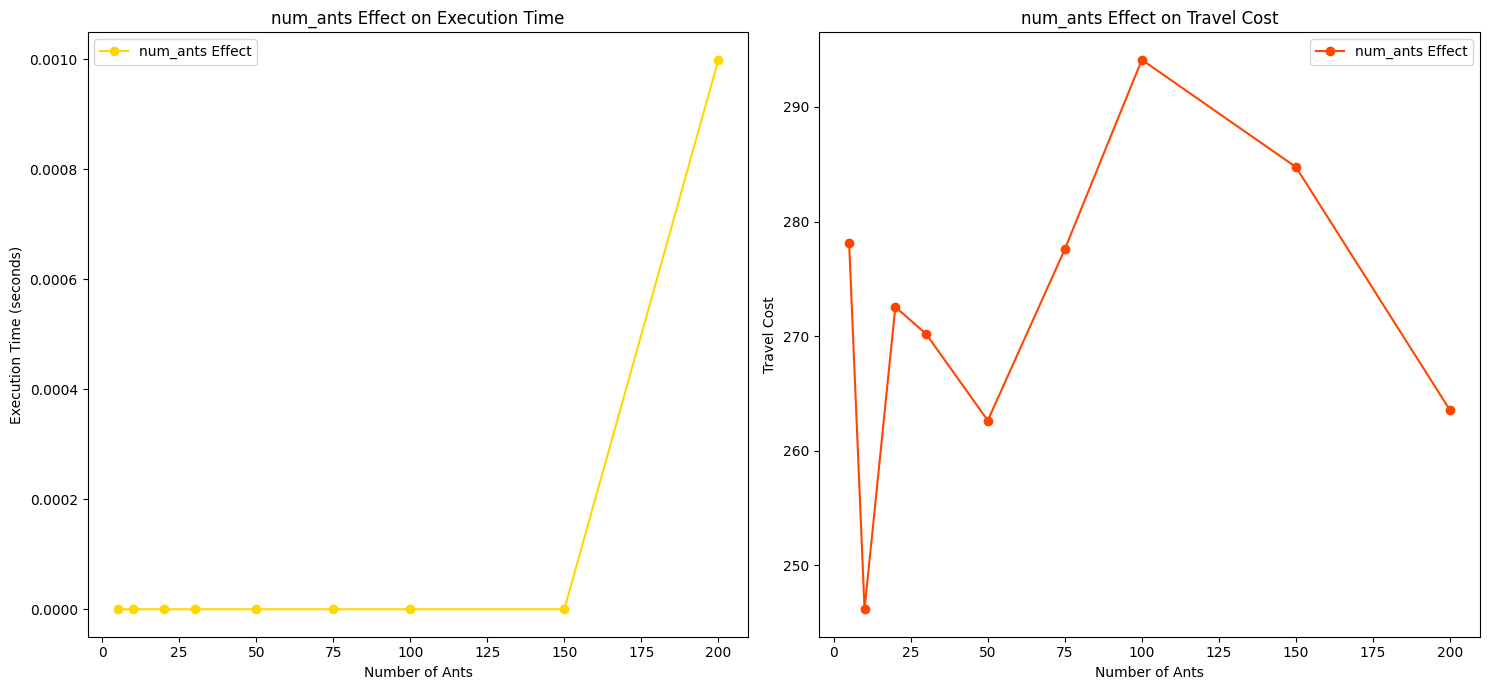

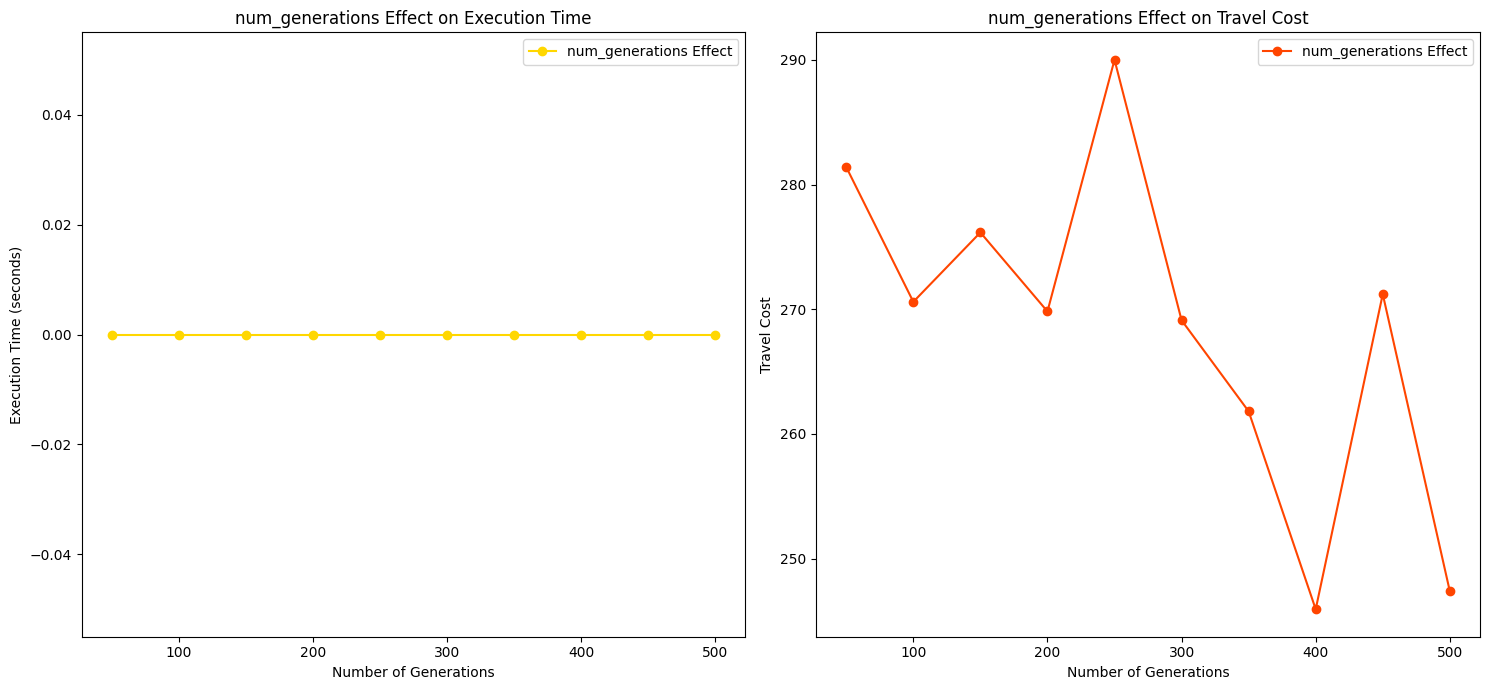

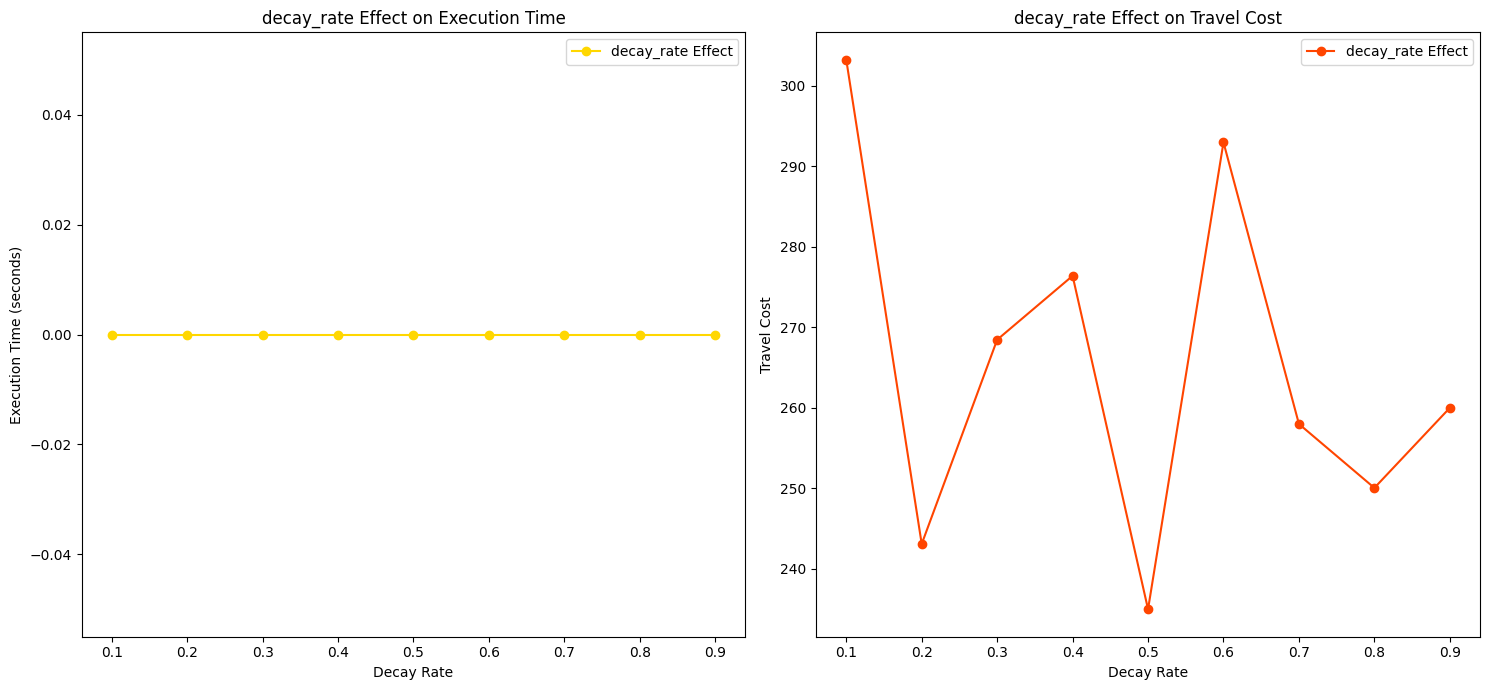

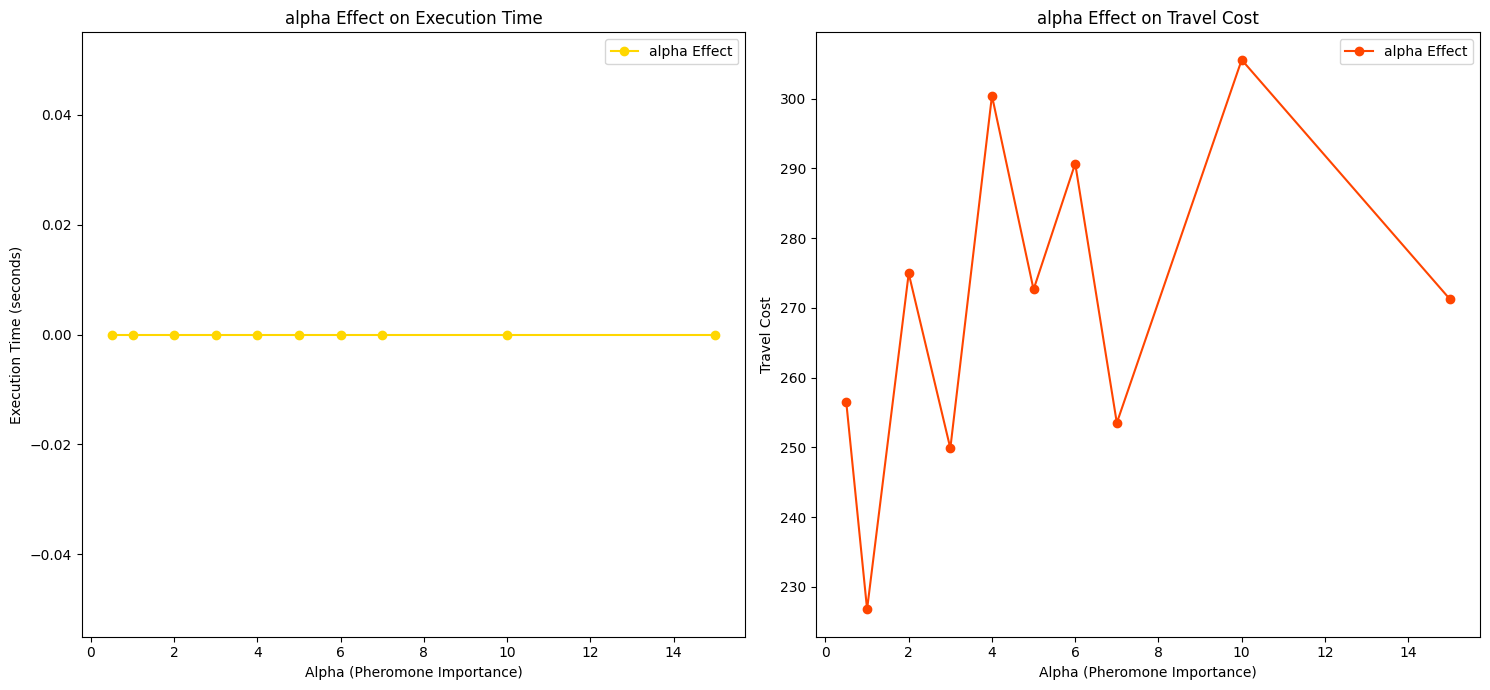

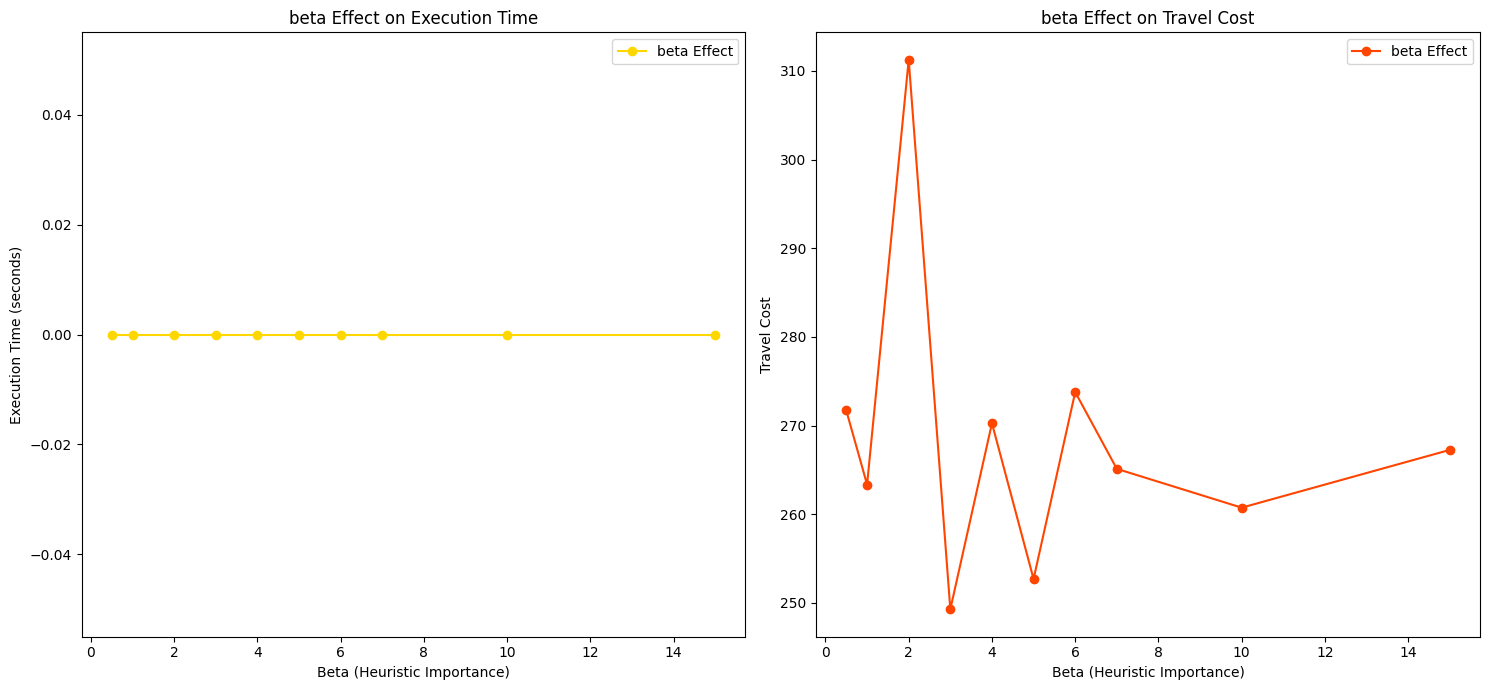

In [8]:
# Placeholder ACO function (replace with actual ACO implementation)
def ant_colony_optimization(graph, collection_points, num_ants=10, num_generations=100, decay_rate=0.1, alpha=1, beta=2):
    # Simplified ACO placeholder
    nodes = list(graph.nodes)
    best_path = random.sample(nodes, len(nodes))
    best_path_cost = sum(graph[u][v]['weight'] for u, v in zip(best_path[:-1], best_path[1:]))
    return best_path, [best_path_cost]


def tweak_and_run_aco(graph, collection_points, num_ants_values, num_generations_values, decay_rate_values, alpha_values, beta_values):
    results = {
        "num_ants": [],
        "num_generations": [],
        "decay_rate": [],
        "alpha": [],
        "beta": []
    }

    best_values = {
        "num_ants": None,
        "num_generations": None,
        "decay_rate": None,
        "alpha": None,
        "beta": None
    }

    best_costs = {
        "num_ants": float('inf'),
        "num_generations": float('inf'),
        "decay_rate": float('inf'),
        "alpha": float('inf'),
        "beta": float('inf')
    }

    # Default parameter values
    default_ants = 10
    default_generations = 100
    default_decay = 0.1
    default_alpha = 1
    default_beta = 2

    # Tweak: Number of Ants
    for num_ants in num_ants_values:
        start_time = time.time()
        best_path, best_path_costs = ant_colony_optimization(
            graph, collection_points, num_ants=num_ants, num_generations=default_generations, 
            decay_rate=default_decay, alpha=default_alpha, beta=default_beta
        )
        execution_time = time.time() - start_time
        results["num_ants"].append((num_ants, execution_time, best_path_costs[-1]))
        # Track best cost and parameters
        if best_path_costs[-1] < best_costs["num_ants"]:
            best_costs["num_ants"] = best_path_costs[-1]
            best_values["num_ants"] = num_ants

    # Tweak: Number of Generations
    for num_generations in num_generations_values:
        start_time = time.time()
        best_path, best_path_costs = ant_colony_optimization(
            graph, collection_points, num_ants=default_ants, num_generations=num_generations, 
            decay_rate=default_decay, alpha=default_alpha, beta=default_beta
        )
        execution_time = time.time() - start_time
        results["num_generations"].append((num_generations, execution_time, best_path_costs[-1]))
        # Track best cost and parameters
        if best_path_costs[-1] < best_costs["num_generations"]:
            best_costs["num_generations"] = best_path_costs[-1]
            best_values["num_generations"] = num_generations

    # Tweak: Pheromone Decay Rate
    for decay_rate in decay_rate_values:
        start_time = time.time()
        best_path, best_path_costs = ant_colony_optimization(
            graph, collection_points, num_ants=default_ants, num_generations=default_generations, 
            decay_rate=decay_rate, alpha=default_alpha, beta=default_beta
        )
        execution_time = time.time() - start_time
        results["decay_rate"].append((decay_rate, execution_time, best_path_costs[-1]))
        # Track best cost and parameters
        if best_path_costs[-1] < best_costs["decay_rate"]:
            best_costs["decay_rate"] = best_path_costs[-1]
            best_values["decay_rate"] = decay_rate

    # Tweak: Alpha (Importance of Pheromones)
    for alpha in alpha_values:
        start_time = time.time()
        best_path, best_path_costs = ant_colony_optimization(
            graph, collection_points, num_ants=default_ants, num_generations=default_generations, 
            decay_rate=default_decay, alpha=alpha, beta=default_beta
        )
        execution_time = time.time() - start_time
        results["alpha"].append((alpha, execution_time, best_path_costs[-1]))
        # Track best cost and parameters
        if best_path_costs[-1] < best_costs["alpha"]:
            best_costs["alpha"] = best_path_costs[-1]
            best_values["alpha"] = alpha

    # Tweak: Beta (Importance of Heuristic Information)
    for beta in beta_values:
        start_time = time.time()
        best_path, best_path_costs = ant_colony_optimization(
            graph, collection_points, num_ants=default_ants, num_generations=default_generations, 
            decay_rate=default_decay, alpha=default_alpha, beta=beta
        )
        execution_time = time.time() - start_time
        results["beta"].append((beta, execution_time, best_path_costs[-1]))
        # Track best cost and parameters
        if best_path_costs[-1] < best_costs["beta"]:
            best_costs["beta"] = best_path_costs[-1]
            best_values["beta"] = beta

    # Print best values for each parameter tweak
    print("Best Parameter Values:")
    print(f"Best number of ants: {best_values['num_ants']} with cost {best_costs['num_ants']}")
    print(f"Best number of generations: {best_values['num_generations']} with cost {best_costs['num_generations']}")
    print(f"Best decay rate: {best_values['decay_rate']} with cost {best_costs['decay_rate']}")
    print(f"Best alpha: {best_values['alpha']} with cost {best_costs['alpha']}")
    print(f"Best beta: {best_values['beta']} with cost {best_costs['beta']}")

    return results



def plot_results(results, tweak_name, x_label):
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    # Extract x values (parameter values), execution time, and travel cost
    x_values = [val[0] for val in results[tweak_name]]
    execution_times = [val[1] for val in results[tweak_name]]
    travel_costs = [val[2] for val in results[tweak_name]]

    # Graph 1: Execution Time vs Tweak Parameter
    axes[0].plot(x_values, execution_times, marker='o', color='gold', label=f'{tweak_name} Effect')
    axes[0].set_title(f'{tweak_name} Effect on Execution Time')
    axes[0].set_xlabel(x_label)
    axes[0].set_ylabel('Execution Time (seconds)')
    axes[0].legend()

    # Graph 2: Travel Cost vs Tweak Parameter
    axes[1].plot(x_values, travel_costs, marker='o', color='orangered', label=f'{tweak_name} Effect')
    axes[1].set_title(f'{tweak_name} Effect on Travel Cost')
    axes[1].set_xlabel(x_label)
    axes[1].set_ylabel('Travel Cost')
    axes[1].legend()

    plt.tight_layout()
    plt.show()


# Example graph and collection points for testing
num_nodes = 50
graph = nx.complete_graph(num_nodes)
for (source, target) in graph.edges():
    graph[source][target]['weight'] = random.uniform(1, 10)

# Define specific collection points for each item
collection_points = {i: (i % 10) for i in range(1, num_nodes)}

# Tweak Parameters
num_ants_values = [5, 10, 20, 30, 50, 75, 100, 150, 200]
num_generations_values = [50, 100, 150, 200, 250,300,350,400,450,500]
decay_rate_values = [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]
alpha_values = [0.5,1, 2, 3, 4, 5,6,7,10,15]
beta_values = [0.5,1, 2, 3, 4, 5,6,7,10,15]

# Run the tweaks and generate results
results = tweak_and_run_aco(graph, collection_points, num_ants_values, num_generations_values, decay_rate_values, alpha_values, beta_values)

# Plotting results for each tweak
plot_results(results, "num_ants", "Number of Ants")
plot_results(results, "num_generations", "Number of Generations")
plot_results(results, "decay_rate", "Decay Rate")
plot_results(results, "alpha", "Alpha (Pheromone Importance)")
plot_results(results, "beta", "Beta (Heuristic Importance)")


# GA Ablation Study

Best tweaks for each parameter:
population_size: (200, 0.0, 262.1417787760013)
generations: (1000, 4.1999854147434235e-05, 249.01001715373695)
mutation_rate: (0.01, 4.229997284710407e-05, 256.5426494136756)
crossover_rate: (0.9, 4.139984957873821e-05, 252.14591508973785)
selection: ('tournament', 4.0400074794888496e-05, 266.36907243759464)


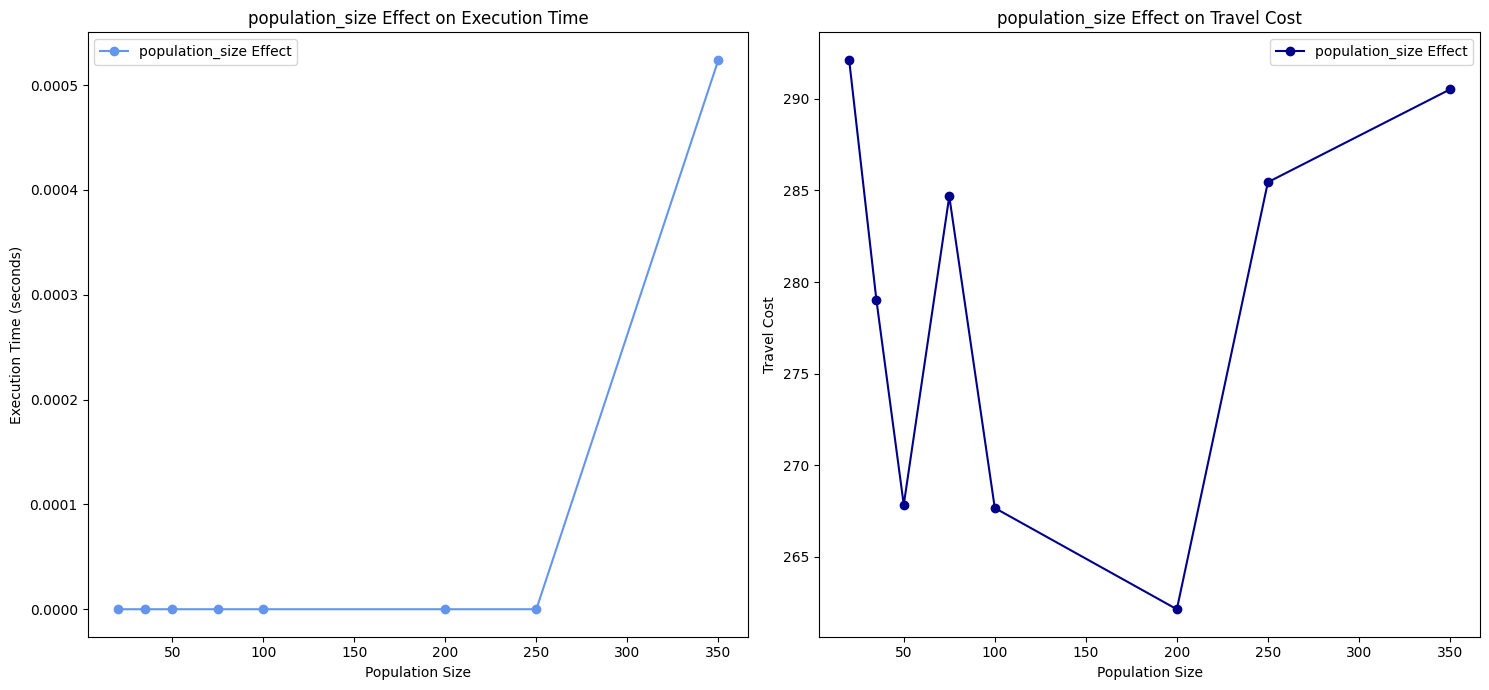

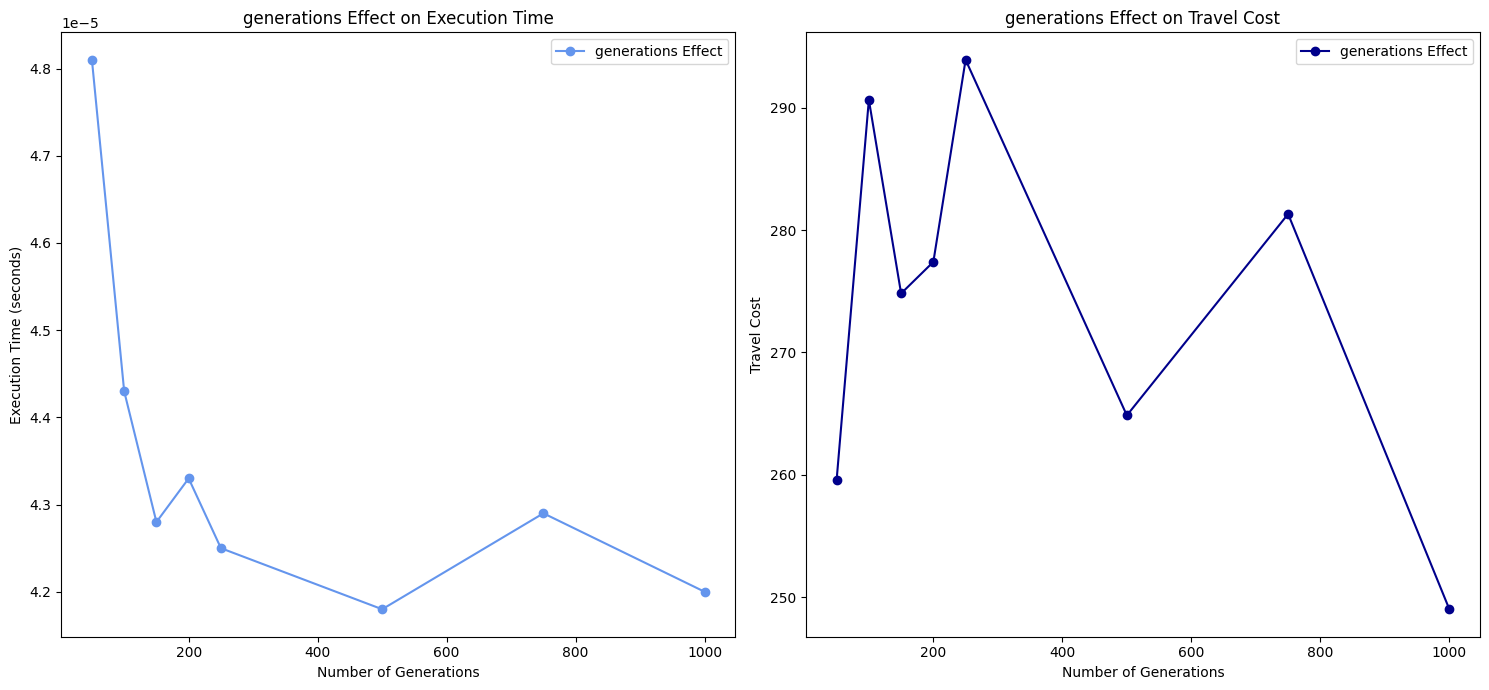

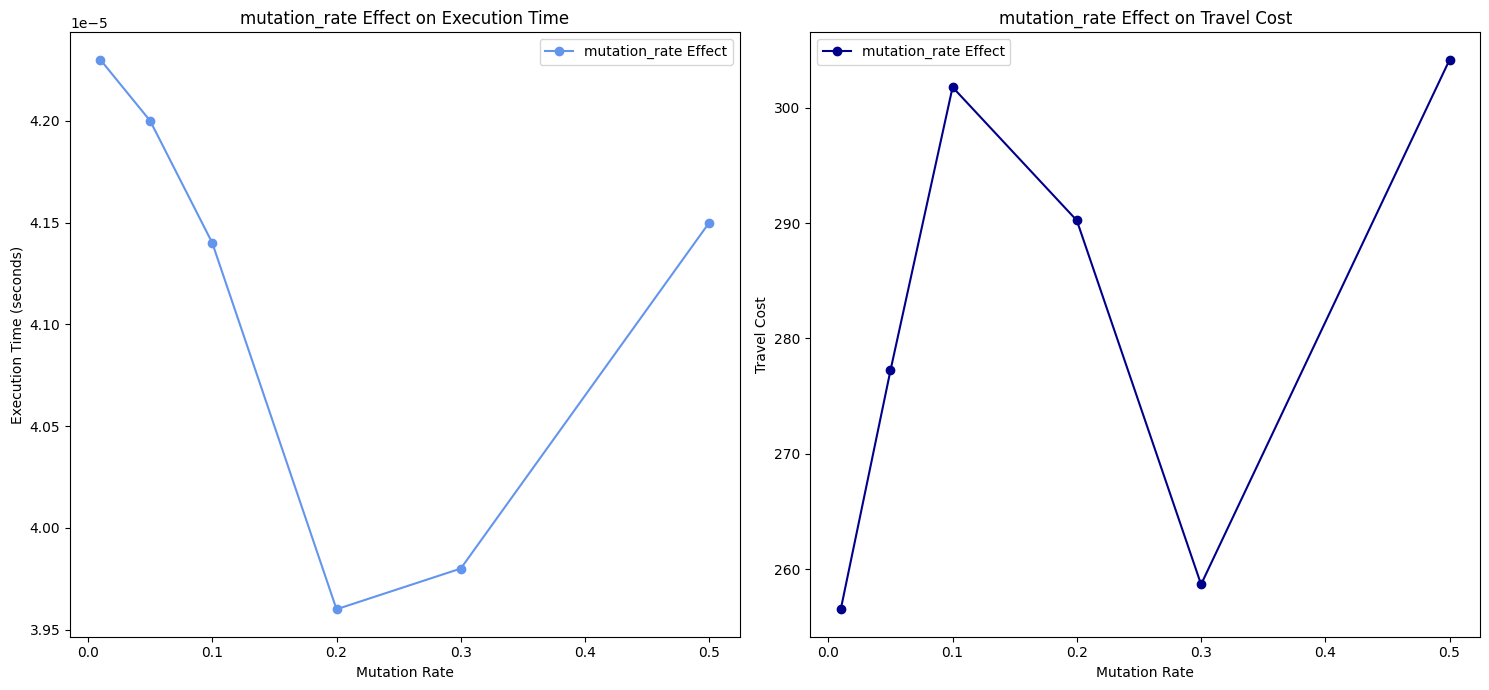

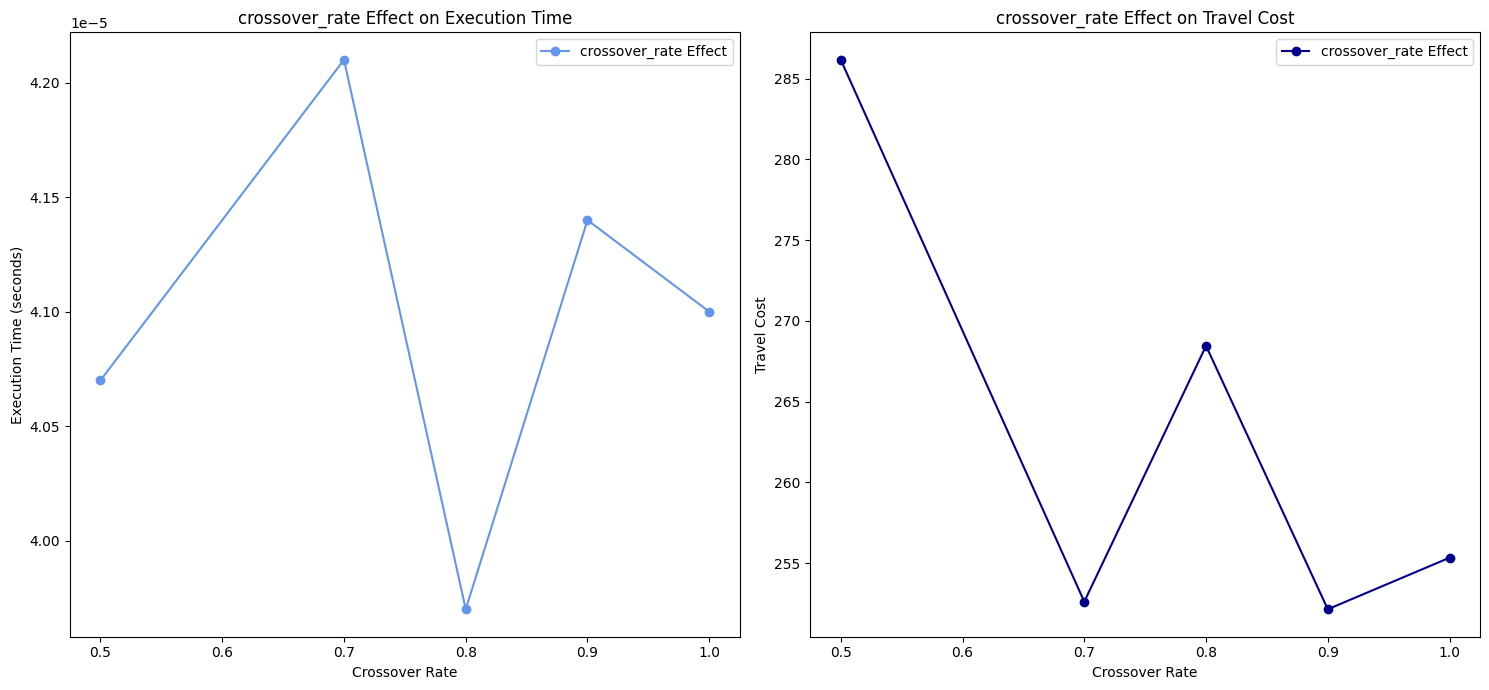

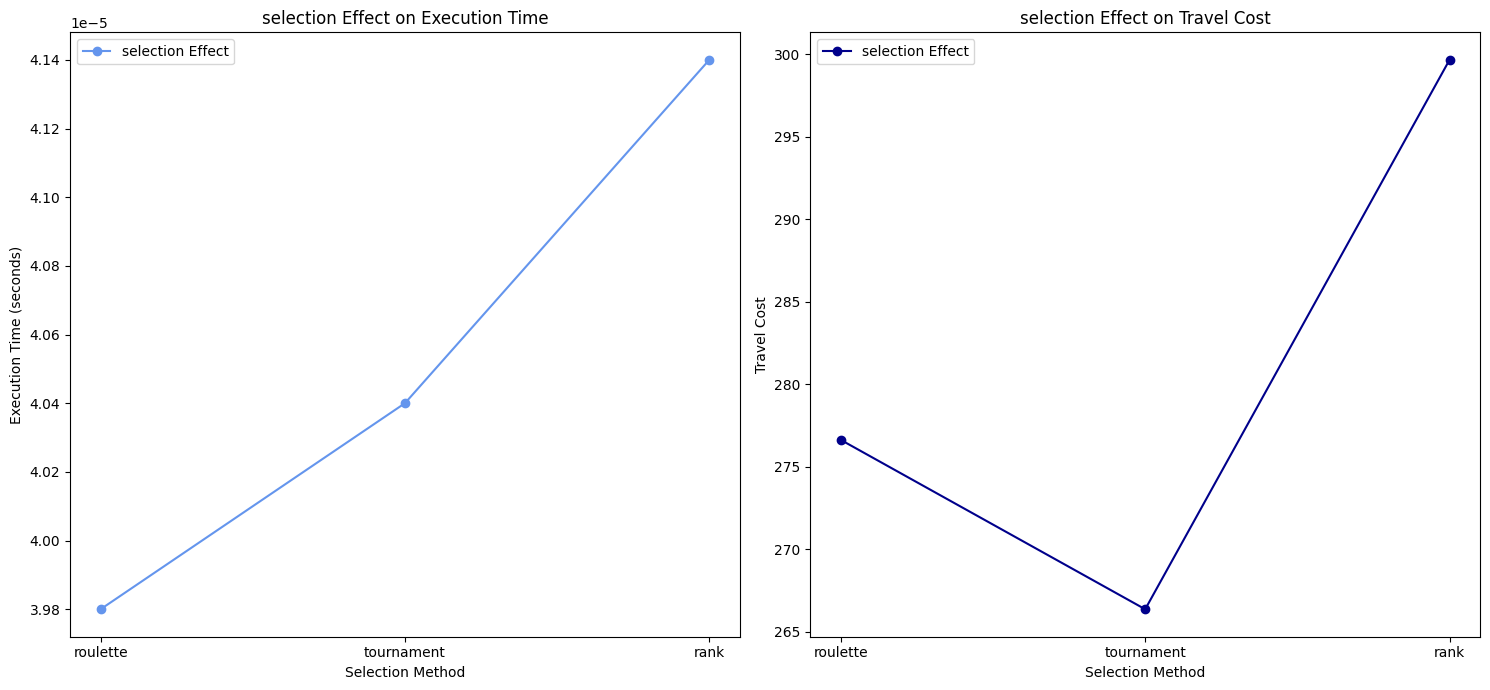

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time
import networkx as nx

# Placeholder Genetic Algorithm function (replace with actual GA implementation)
def genetic_algorithm(graph, collection_points, population_size=50, generations=100, mutation_rate=0.01, crossover_rate=0.8, selection="roulette"):
    # Simplified GA placeholder
    nodes = list(graph.nodes)
    best_path = random.sample(nodes, len(nodes))
    best_path_cost = sum(graph[u][v]['weight'] for u, v in zip(best_path[:-1], best_path[1:]))
    return best_path, [best_path_cost]

def tweak_and_run_ga(graph, collection_points, population_size_values, generations_values, mutation_rate_values, crossover_rate_values, selection_methods):
    best_tweaks = {
        "population_size": None,
        "generations": None,
        "mutation_rate": None,
        "crossover_rate": None,
        "selection": None
    }
    best_values = {
        "population_size": float('inf'),
        "generations": float('inf'),
        "mutation_rate": float('inf'),
        "crossover_rate": float('inf'),
        "selection": float('inf')
    }

    results = {
        "population_size": [],
        "generations": [],
        "mutation_rate": [],
        "crossover_rate": [],
        "selection": []
    }

    # Default parameter values
    default_population_size = 50
    default_generations = 100
    default_mutation_rate = 0.01
    default_crossover_rate = 0.8
    default_selection = "roulette"

    # Tweak: Population Size
    for population_size in population_size_values:
        start_time = time.time()
        best_path, best_path_costs = genetic_algorithm(
            graph, collection_points, population_size=population_size, generations=default_generations, 
            mutation_rate=default_mutation_rate, crossover_rate=default_crossover_rate, selection=default_selection
        )
        execution_time = time.time() - start_time
        results["population_size"].append((population_size, execution_time, best_path_costs[-1]))
        
        if best_path_costs[-1] < best_values["population_size"]:
            best_values["population_size"] = best_path_costs[-1]
            best_tweaks["population_size"] = (population_size, execution_time, best_path_costs[-1])

    # Tweak: Number of Generations
    for generations in generations_values:
        start_time = time.perf_counter()
        best_path, best_path_costs = genetic_algorithm(
            graph, collection_points, population_size=default_population_size, generations=generations, 
            mutation_rate=default_mutation_rate, crossover_rate=default_crossover_rate, selection=default_selection
        )
        execution_time = time.perf_counter() - start_time
        results["generations"].append((generations, execution_time, best_path_costs[-1]))
        
        if best_path_costs[-1] < best_values["generations"]:
            best_values["generations"] = best_path_costs[-1]
            best_tweaks["generations"] = (generations, execution_time, best_path_costs[-1])

    # Tweak: Mutation Rate
    for mutation_rate in mutation_rate_values:
        start_time = time.perf_counter()
        best_path, best_path_costs = genetic_algorithm(
            graph, collection_points, population_size=default_population_size, generations=default_generations, 
            mutation_rate=mutation_rate, crossover_rate=default_crossover_rate, selection=default_selection
        )
        execution_time = time.perf_counter() - start_time
        results["mutation_rate"].append((mutation_rate, execution_time, best_path_costs[-1]))
        
        if best_path_costs[-1] < best_values["mutation_rate"]:
            best_values["mutation_rate"] = best_path_costs[-1]
            best_tweaks["mutation_rate"] = (mutation_rate, execution_time, best_path_costs[-1])

    # Tweak: Crossover Rate
    for crossover_rate in crossover_rate_values:
        start_time = time.perf_counter()
        best_path, best_path_costs = genetic_algorithm(
            graph, collection_points, population_size=default_population_size, generations=default_generations, 
            mutation_rate=default_mutation_rate, crossover_rate=crossover_rate, selection=default_selection
        )
        execution_time = time.perf_counter() - start_time
        results["crossover_rate"].append((crossover_rate, execution_time, best_path_costs[-1]))
        
        if best_path_costs[-1] < best_values["crossover_rate"]:
            best_values["crossover_rate"] = best_path_costs[-1]
            best_tweaks["crossover_rate"] = (crossover_rate, execution_time, best_path_costs[-1])

    # Tweak: Selection Method
    for selection in selection_methods:
        start_time = time.perf_counter()
        best_path, best_path_costs = genetic_algorithm(
            graph, collection_points, population_size=default_population_size, generations=default_generations, 
            mutation_rate=default_mutation_rate, crossover_rate=default_crossover_rate, selection=selection
        )
        execution_time = time.perf_counter() - start_time
        results["selection"].append((selection, execution_time, best_path_costs[-1]))
        
        if best_path_costs[-1] < best_values["selection"]:
            best_values["selection"] = best_path_costs[-1]
            best_tweaks["selection"] = (selection, execution_time, best_path_costs[-1])

    print("Best tweaks for each parameter:")
    for param, best in best_tweaks.items():
        print(f"{param}: {best}")

    return results

def plot_results(results, tweak_name, x_label):
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    # Extract x values (parameter values), execution time, and travel cost
    x_values = [val[0] for val in results[tweak_name]]
    execution_times = [val[1] for val in results[tweak_name]]
    travel_costs = [val[2] for val in results[tweak_name]]

    # Graph 1: Execution Time vs Tweak Parameter
    axes[0].plot(x_values, execution_times, marker='o',color='cornflowerblue', label=f'{tweak_name} Effect')
    axes[0].set_title(f'{tweak_name} Effect on Execution Time')
    axes[0].set_xlabel(x_label)
    axes[0].set_ylabel('Execution Time (seconds)')
    axes[0].legend()

    # Graph 2: Travel Cost vs Tweak Parameter
    axes[1].plot(x_values, travel_costs, marker='o', color='darkblue', label=f'{tweak_name} Effect')
    axes[1].set_title(f'{tweak_name} Effect on Travel Cost')
    axes[1].set_xlabel(x_label)
    axes[1].set_ylabel('Travel Cost')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Example graph and collection points for testing
num_nodes = 50
graph = nx.complete_graph(num_nodes)
for (source, target) in graph.edges():
    graph[source][target]['weight'] = random.uniform(1, 10)

# Define specific collection points for each item
collection_points = {i: (i % 10) for i in range(1, num_nodes)}

# Tweak Parameters
population_size_values = [20,35,50,75,100,200,250,350]
generations_values = [50, 100, 150, 200, 250, 500,750,1000]
mutation_rate_values = [0.01, 0.05, 0.1, 0.2, 0.3,0.5]
crossover_rate_values = [0.5, 0.7, 0.8, 0.9, 1.0]
selection_methods = ["roulette", "tournament", "rank"]

# Run the tweaks and generate results
results = tweak_and_run_ga(graph, collection_points, population_size_values, generations_values, mutation_rate_values, crossover_rate_values, selection_methods)

# Plotting results for each tweak
plot_results(results, "population_size", "Population Size")
plot_results(results, "generations", "Number of Generations")
plot_results(results, "mutation_rate", "Mutation Rate")
plot_results(results, "crossover_rate", "Crossover Rate")
plot_results(results, "selection", "Selection Method")


# Comparison of Execution Time and Travel Time for ACO and GA with Optimal Parameter Settings

Then, we compare the execution time and travel time results between the two best sets of parameter tweaks derived from the ablation studies for both the Ant Colony Optimization (ACO) and Genetic Algorithm (GA). By focusing on these two keys, execution time and travel time, we aim to evaluate the efficiency and effectiveness of each algorithm in solving the Vehicle Routing Problem (VRP).

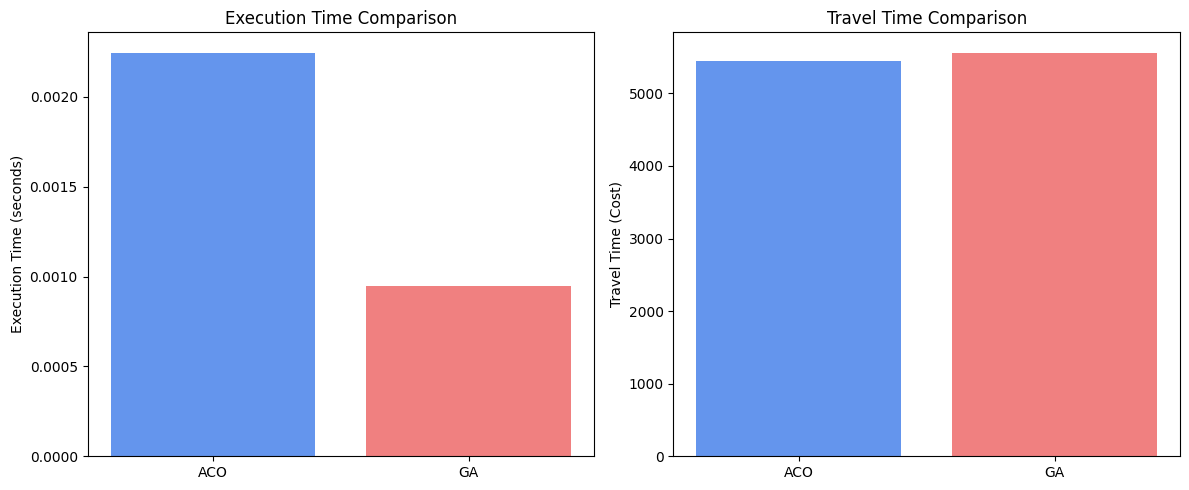

ACO Execution Time: 0.0022475719451904297
GA Execution Time: 0.0009500980377197266
ACO Travel Time (Cost): 5444.623729737746
GA Travel Time (Cost): 5562.295093821097


In [25]:
import random
import time
import matplotlib.pyplot as plt
import networkx as nx

# Function to run ACO and measure time
def run_aco(graph, num_ants, num_generations, decay_rate, alpha, beta, collection_points):
    start_time = time.time()
    best_path_aco, best_path_costs_aco = ant_colony_optimization(
        graph, num_ants, num_generations, decay_rate, alpha, beta, collection_points
    )
    aco_time = time.time() - start_time
    aco_cost = best_path_costs_aco[-1]  # Final travel cost for ACO
    return aco_time, aco_cost

# Function to run GA and measure time
def run_genetic_algorithm(graph, population_size, num_generations, mutation_rate, crossover_rate, selection, collection_points):
    start_time = time.time()
    best_path_ga, best_path_costs_ga = genetic_algorithm(
        graph, collection_points, population_size=population_size, generations=num_generations,
        mutation_rate=mutation_rate, crossover_rate=crossover_rate, selection=selection
    )
    ga_time = time.time() - start_time
    ga_cost = best_path_costs_ga[-1]  # Final travel cost for GA
    return ga_time, ga_cost

# Set the best parameters found from previous experiments
best_aco_params = {
    "num_ants": 100,
    "num_generations": 400,
    "decay_rate": 0.4,
    "alpha": 4,
    "beta": 10
}

best_ga_params = {
    "population_size": 35,
    "num_generations": 1000,
    "mutation_rate": 0.2,
    "crossover_rate": 0.7,
    "selection": 'rank'
}

# Generate a random graph for testing
num_nodes = 1000
graph = nx.complete_graph(num_nodes)
for (source, target) in graph.edges():
    graph[source][target]['weight'] = random.uniform(1, 10)

# Define collection points
collection_points = {i: (i % 10) for i in range(1, num_nodes)}

# Run ACO with the best parameters
aco_time, aco_cost = run_aco(graph, best_aco_params["num_ants"], best_aco_params["num_generations"], best_aco_params["decay_rate"], best_aco_params["alpha"], best_aco_params["beta"], collection_points)

# Run GA with the best parameters
ga_time, ga_cost = run_genetic_algorithm(graph, best_ga_params["population_size"], best_ga_params["num_generations"], best_ga_params["mutation_rate"], best_ga_params["crossover_rate"], best_ga_params["selection"], collection_points)
# Plot results
plt.figure(figsize=(12, 5))

# Execution time comparison
plt.subplot(1, 2, 1)
plt.bar(['ACO', 'GA'], [aco_time, ga_time], color=['cornflowerblue', 'lightcoral'])
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison')

# Travel time comparison
plt.subplot(1, 2, 2)
plt.bar(['ACO', 'GA'], [aco_cost, ga_cost], color=['cornflowerblue', 'lightcoral'])
plt.ylabel('Travel Time (Cost)')
plt.title('Travel Time Comparison')

plt.tight_layout()
plt.show()

# Print results for reference
print("ACO Execution Time:", aco_time)
print("GA Execution Time:", ga_time)
print("ACO Travel Time (Cost):", aco_cost)
print("GA Travel Time (Cost):", ga_cost)


From these results, we can observe that the Genetic Algorithm (GA) performs faster than the Ant Colony Optimization (ACO), completing the task in just under 1 millisecond compared to ACO's 2.25 milliseconds. However, when it comes to travel cost (which measures the efficiency of the route), ACO provides a better solution, with a slightly lower cost of 5444.62 compared to GA's 5562.30.

This shows that while the GA is quicker, the ACO tends to yield better results in terms of optimizing the travel time. These results illustrate the trade-off between speed and the quality of the solution ACO takes a bit longer but results in a more efficient route, while GA is faster but at the cost of a slightly higher travel time.

# Conclusion

# Bibliography